In [364]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


In [365]:
pip install category_encoders


In [366]:
df = pd.read_excel('train.xlsx')
X_test = pd.read_excel('test.xlsx')

df.head()

,ID,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,MLSkillsSelect,MLTechniquesSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction
0,1,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Yes,Software Developer/Software Engineer,Fine,Self-employed,Python,Link Analysis,SAS,NaN,NaN,Very useful,NaN,NaN,NaN,Not Useful,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3 to 5 years,"Programmer,Software Developer/Software Engineer",Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",Technology,NaN,Always,Random Forests,Often,NaN,Often,NaN,NaN,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,Often,NaN,NaN,NaN,NaN,8.0,51-75% of projects,Approximately half internal and half external,Standalone Team,NaN,4
1,2,Male,Mexico,26.0,Employed full-time,Yes,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,Somewhat useful,Very useful,NaN,NaN,NaN,Very useful,NaN,No,Master's degree,Computer Science,1 to 2 years,"Computer Scientist,Programmer,Researcher","Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",Government,"1,000 to 4,999 employees",Rarely,"Bayesian Techniques,SVMs",Sometimes,Often,NaN,Sometimes,Most of the time,NaN,NaN,NaN,NaN,NaN,Rarely,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,100% of projects,More internal than external,Business Department,NaN,7
2,3,Female,United States,34.0,Employed full-time,Yes,Data Analyst,Fine,Employed by government,TensorFlow,Deep learning,Python,Very useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,Somewhat useful,Sort of (Explain more),Doctoral degree,Mathematics or statistics,6 to 10 years,"Engineer,Operations Research Practitioner,Pred...",Supervised Machine Learning (Tabular Data),"Ensemble Methods,Evolutionary Approaches,Neura...",Government,"1,000 to 4,999 employees",Rarely,"Neural Networks,Regression/Logistic Regression",Sometimes,Often,NaN,Often,Often,NaN,NaN,Often,Sometimes,NaN,Sometimes,NaN,Sometimes,NaN,NaN,Sometimes,NaN,Most of the time,2.0,10-25% of projects,More internal than external,Other,Rarely,6
3,4,Female,United States,33.0,Employed full-time,Yes,Scientist/Researcher,Fine,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,NaN,NaN,Very useful,NaN,Somewhat useful,NaN,NaN,No,Doctoral degree,Engineering (non-computer focused),More than 10 years,"Engineer,Researcher",Computer Vision,"Bayesian Techniques,Support Vector Machines (S...",Academic,"5,000 to 9,999 employees",Sometimes,"Markov Logic Networks,Regression/Logistic Regr...",Sometimes,NaN,NaN,NaN,Often,NaN,Sometimes,NaN,Often,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,Rarely,Rarely,2.0,76-99% of projects,Do not know,Other,Rarely,9
4,5,Female,United States,35.0,Employed full-time,Yes,Software Developer/Software Engineer

In [367]:
df.shape

(5529, 54)

In [368]:
df = df.drop(columns=["ID", "CodeWriter"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


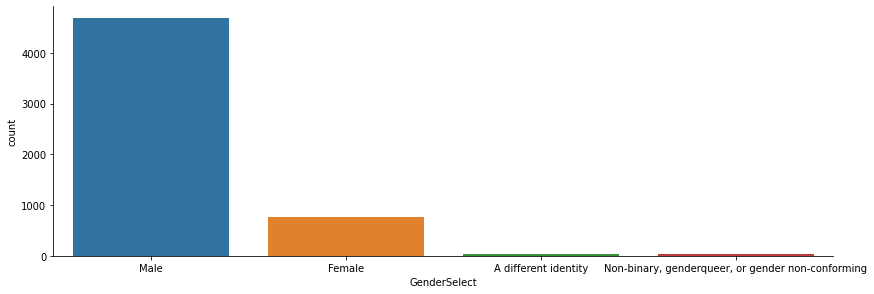

In [369]:
#sns.set_style("whitegrid")
sns.catplot("GenderSelect", data=df, kind="count", height=4, orient="h", aspect=3)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


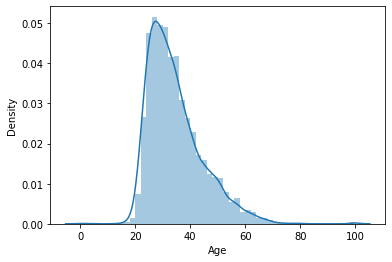

In [370]:
sns.distplot(df["Age"])

In [371]:
df.columns.to_list()

['GenderSelect',
 'Country',
 'Age',
 'EmploymentStatus',
 'CurrentJobTitleSelect',
 'TitleFit',
 'CurrentEmployerType',
 'MLToolNextYearSelect',
 'MLMethodNextYearSelect',
 'LanguageRecommendationSelect',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessYouTube',
 'DataScienceIdentitySelect',
 'FormalEducation',
 'MajorSelect',
 'Tenure',
 'PastJobTitlesSelect',
 'MLSkillsSelect',
 'MLTechniquesSelect',
 'EmployerIndustry',
 'EmployerSize',
 'WorkProductionFrequency',
 'WorkAlgorithmsSelect',
 'WorkToolsFrequencyPython',
 'WorkToolsFrequencyR',
 'WorkToolsFrequencySQL',
 'WorkMethodsFrequencyCross-Validation',
 'WorkMethodsFrequencyDataVisualization',
 'WorkMethodsFrequencyDecisionTrees',
 'WorkMethodsFrequencyLogisticRegression',
 'WorkMethodsFrequencyNeuralNetworks',
 'WorkMethodsFrequ

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


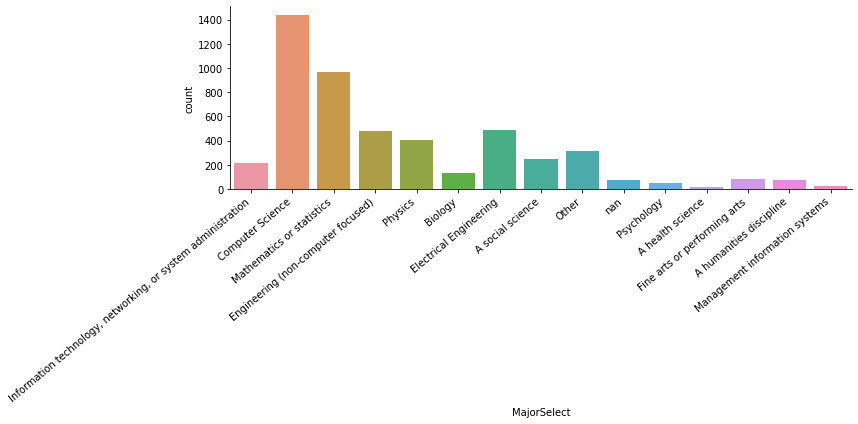

In [372]:
ax = sns.catplot("MajorSelect", data=df, kind="count", height=6, orient="v", aspect=2)
ax.set_xticklabels(df.MajorSelect.unique(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [373]:
titles = df["PastJobTitlesSelect"].unique().tolist()

In [374]:
unq_titles = []
for x in titles:
    if x is np.nan:
        pass
    else:
        words = x.split(',')
        for w in words:
            if w not in unq_titles:
                unq_titles.append(w)

In [375]:
pastTitles = pd.DataFrame()
for c in unq_titles:
    pastTitles[c] = np.zeros((df.shape[0]), dtype=int)

In [376]:
for row in df.itertuples():
    t = row.PastJobTitlesSelect
    if t is np.nan:
        pass
    else:
        words = t.split(',')
        for w in words:
            pastTitles[w][row.Index] = 1

In [377]:
count = [pastTitles[t].sum() for t in pastTitles.columns.to_list()]
titles = pastTitles.columns.to_list()

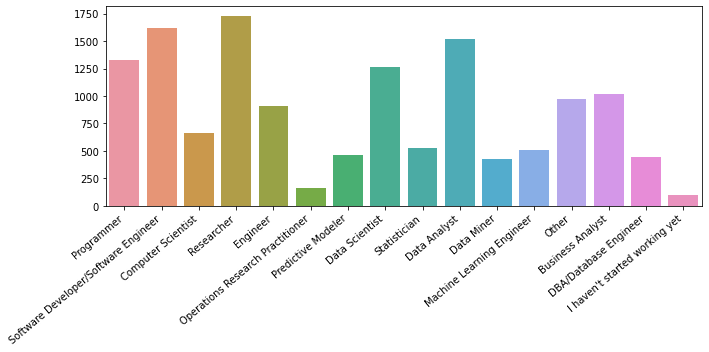

In [378]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=titles, y=count)
ax.set_xticklabels(titles, rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [379]:
df["RemoteWork"].unique()

array([nan, 'Rarely', 'Most of the time', 'Never', 'Sometimes', 'Always',
       "Don't know"], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


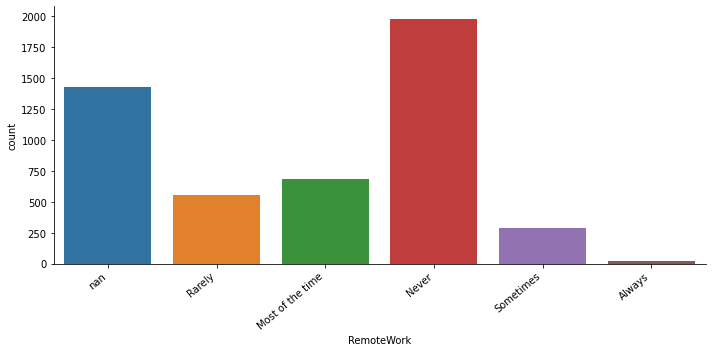

In [380]:
ax = sns.catplot("RemoteWork", data=df, kind="count", height=5, orient="v", aspect=2)
ax.set_xticklabels(df.RemoteWork.unique(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [381]:
mapping_titlefit = {'Fine': 2, 'Poorly': 1, 'Perfectly': 3}

mapping_usefulness = {'Somewhat useful': 2, 'Very useful': 3, 'Not Useful': 1, np.nan: 0}

mapping_edu = {"Bachelor's degree": 3, "Master's degree": 4, 'Doctoral degree': 5,
 "Some college/university study without earning a bachelor's degree": 2,
 'Professional degree': 3,
 'I did not complete any formal education past high school': 1,
 'I prefer not to answer': np.nan}

mapping_tenure = {'3 to 5 years': 3, '1 to 2 years': 2, '6 to 10 years': 4, 'More than 10 years': 5,'Less than a year': 1, "I don't write code to analyze data": 0}

mapping_workprod_n_remote = {'Always': 4, 'Rarely': 1, 'Sometimes': 2, 'Most of the time': 3, 'Never': 0, "Don't know": np.nan}

mapping_freq = {'Often': 3, 'Most of the time': 4, 'Sometimes': 2, 'Rarely': 1, np.nan: 0}

mapping_vis = {'51-75% of projects': 4, '100% of projects': 6, '10-25% of projects': 2, '76-99% of projects': 5, 'Less than 10% of projects': 1, '26-50% of projects': 3, 'None': 0}

mapping_worktools = {'Approximately half internal and half external': 3,
 'More internal than external':2, 'Do not know':0, 'Entirely internal':1,
 'Entirely external':5, 'More external than internal':4}

mapping_employerSize = { '1,000 to 4,999 employees':6, '5,000 to 9,999 employees':7,
 '10,000 or more employees':8, 'Fewer than 10 employees':1, '10 to 19 employees':2,
 '500 to 999 employees':5, "I don't know":0, '20 to 99 employees':3,
 '100 to 499 employees':4 ,'I prefer not to answer' : 0 }

In [382]:

df['TitleFit'] = df['TitleFit'].replace(mapping_titlefit)

for c in ['LearningPlatformUsefulnessBlogs',
       'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook',
       'LearningPlatformUsefulnessYouTube']:
    df[c] = df[c].replace(mapping_usefulness)

#df['FormalEducation'] = df['FormalEducation'].replace(mapping_edu)

df['Tenure'] = df['Tenure'].replace(mapping_tenure)

df['WorkProductionFrequency'] = df['WorkProductionFrequency'].replace(mapping_workprod_n_remote)

df['RemoteWork'] = df['RemoteWork'].replace(mapping_workprod_n_remote)

for c in ['WorkToolsFrequencyPython', 'WorkToolsFrequencyR',
       'WorkToolsFrequencySQL', 'WorkMethodsFrequencyCross-Validation',
       'WorkMethodsFrequencyDataVisualization',
       'WorkMethodsFrequencyDecisionTrees',
       'WorkMethodsFrequencyLogisticRegression',
       'WorkMethodsFrequencyNeuralNetworks', 'WorkMethodsFrequencyPCA',
       'WorkMethodsFrequencyRandomForests',
       'WorkMethodsFrequencyTimeSeriesAnalysis',
       'WorkChallengeFrequencyPolitics', 'WorkChallengeFrequencyUnusedResults',
       'WorkChallengeFrequencyDirtyData', 'WorkChallengeFrequencyExplaining',
       'WorkChallengeFrequencyTalent', 'WorkChallengeFrequencyClarity',
       'WorkChallengeFrequencyDataAccess']:
    df[c] = df[c].replace(mapping_freq)

df['WorkDataVisualizations'] = df['WorkDataVisualizations'].replace(mapping_vis)

df['EmployerSize'] = df['EmployerSize'].replace(mapping_employerSize)
df['WorkInternalVsExternalTools'] = df['WorkInternalVsExternalTools'].replace(mapping_worktools)

In [383]:
tmp = df[["Tenure", "Age", "TitleFit", "EmployerSize", "CompensationScore", 'LearningPlatformUsefulnessBlogs',
       'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook',
       'LearningPlatformUsefulnessYouTube', 'JobSatisfaction']]

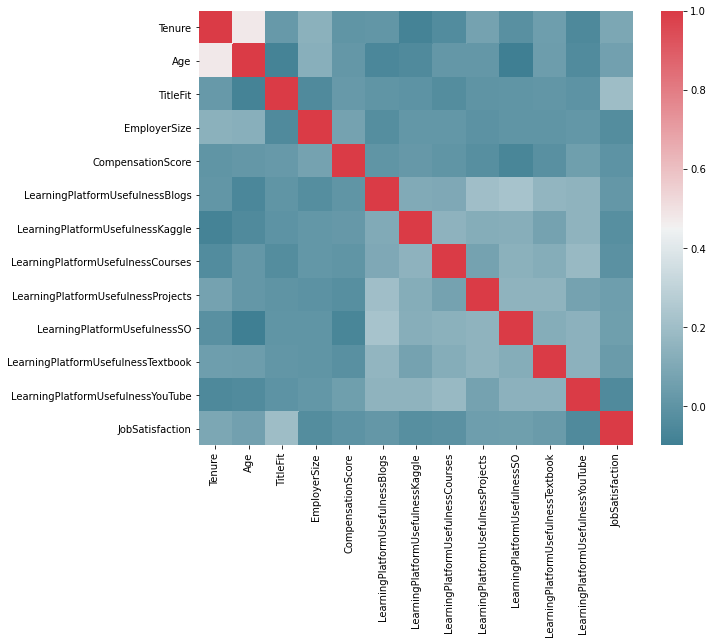

In [384]:
f, ax = plt.subplots(figsize=(10, 8))
corr = tmp.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [385]:
from scipy import stats

In [463]:
cols = df.columns.tolist()
for c in cols:
    df[c] = df[c].fillna(df[c].mode()[0])

In [387]:
stats.pearsonr(df["TitleFit"], df["JobSatisfaction"])

(0.1917497777345963, 6.113403077706289e-47)

In [465]:
df = pd.read_excel('train.xlsx')

In [466]:
df = df.drop(columns=["ID", "CodeWriter"])

In [390]:
df["CurrentJobTitleSelect"].unique()

array(['Software Developer/Software Engineer', 'Computer Scientist',
       'Data Analyst', 'Scientist/Researcher', 'Data Scientist',
       'Programmer', 'Machine Learning Engineer', 'Researcher',
       'Business Analyst', 'DBA/Database Engineer', 'Data Miner',
       'Predictive Modeler', 'Engineer', 'Other', 'Statistician',
       'Operations Research Practitioner', nan], dtype=object)

In [391]:
df['TitleFit'].unique()

array(['Fine', 'Poorly', 'Perfectly', nan], dtype=object)

In [392]:
avgs = []
choices = df["WorkChallengeFrequencyDirtyData"].unique()

for x in df["WorkChallengeFrequencyDirtyData"].unique():
    avgs += [df[df["WorkChallengeFrequencyDirtyData"] == x]["JobSatisfaction"].sum() / df[df["WorkChallengeFrequencyDirtyData"] == x]["JobSatisfaction"].shape[0]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [393]:
print(choices)
print(avgs)

['Often' nan 'Most of the time' 'Sometimes' 'Rarely']
[7.012511170688114, nan, 6.858714043993232, 6.904231625835189, 6.578947368421052]


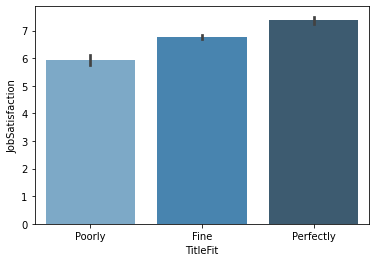

In [394]:
ax = sns.barplot(x="TitleFit", y="JobSatisfaction", data=df, palette="Blues_d", order=['Poorly', 'Fine', 'Perfectly'])

In [395]:
title_poor = df[df["TitleFit"] == 'Poorly']

In [396]:
title_fine = df[df['TitleFit'] == 'Fine']

In [397]:
title_perf = df[df['TitleFit'] == 'Perfectly']

In [398]:
title_fine["CurrentJobTitleSelect"].value_counts()

Data Scientist                          981
Data Analyst                            413
Software Developer/Software Engineer    385
Scientist/Researcher                    318
Other                                   267
Machine Learning Engineer               239
Researcher                              203
Business Analyst                        184
Engineer                                118
Computer Scientist                       88
Programmer                               87
Statistician                             86
Predictive Modeler                       77
DBA/Database Engineer                    52
Data Miner                               35
Operations Research Practitioner         19
Name: CurrentJobTitleSelect, dtype: int64

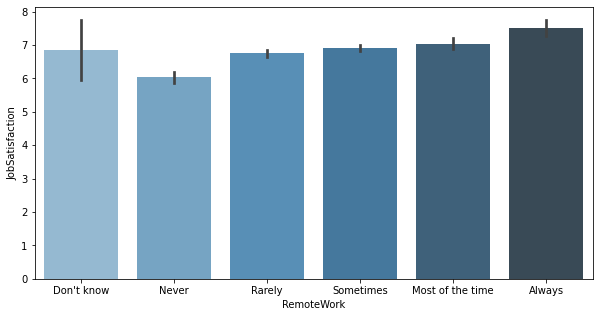

In [399]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="RemoteWork", y="JobSatisfaction", data=df, palette="Blues_d", order=["Don't know", 'Never', 'Rarely', 'Sometimes', 'Most of the time', 'Always'])


In [400]:
tmp = df[["EmployerSize", "JobSatisfaction"]].dropna()

In [401]:
tmp.EmployerSize.unique()

array(['1,000 to 4,999 employees', '5,000 to 9,999 employees',
       '10,000 or more employees', 'Fewer than 10 employees',
       '10 to 19 employees', '500 to 999 employees', "I don't know",
       '20 to 99 employees', '100 to 499 employees',
       'I prefer not to answer'], dtype=object)

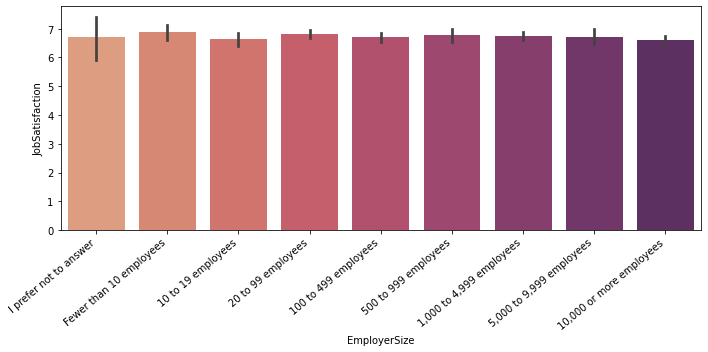

In [402]:
titles = ['I prefer not to answer', 'Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees', '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees']
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="EmployerSize", y="JobSatisfaction", data=tmp, palette="flare", order=titles)
ax.set_xticklabels(titles, rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [481]:

df['TitleFit'] = df['TitleFit'].replace(mapping_titlefit)

for c in ['LearningPlatformUsefulnessBlogs',
       'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook',
       'LearningPlatformUsefulnessYouTube']:
    df[c] = df[c].replace(mapping_usefulness)

#df['FormalEducation'] = df['FormalEducation'].replace(mapping_edu)

df['Tenure'] = df['Tenure'].replace(mapping_tenure)

df['WorkProductionFrequency'] = df['WorkProductionFrequency'].replace(mapping_workprod_n_remote)

df['RemoteWork'] = df['RemoteWork'].replace(mapping_workprod_n_remote)

for c in ['WorkToolsFrequencyPython', 'WorkToolsFrequencyR',
       'WorkToolsFrequencySQL', 'WorkMethodsFrequencyCross-Validation',
       'WorkMethodsFrequencyDataVisualization',
       'WorkMethodsFrequencyDecisionTrees',
       'WorkMethodsFrequencyLogisticRegression',
       'WorkMethodsFrequencyNeuralNetworks', 'WorkMethodsFrequencyPCA',
       'WorkMethodsFrequencyRandomForests',
       'WorkMethodsFrequencyTimeSeriesAnalysis',
       'WorkChallengeFrequencyPolitics', 'WorkChallengeFrequencyUnusedResults',
       'WorkChallengeFrequencyDirtyData', 'WorkChallengeFrequencyExplaining',
       'WorkChallengeFrequencyTalent', 'WorkChallengeFrequencyClarity',
       'WorkChallengeFrequencyDataAccess']:
    df[c] = df[c].replace(mapping_freq)

df['WorkDataVisualizations'] = df['WorkDataVisualizations'].replace(mapping_vis)

df['EmployerSize'] = df['EmployerSize'].replace(mapping_employerSize)
df['WorkInternalVsExternalTools'] = df['WorkInternalVsExternalTools'].replace(mapping_worktools)

In [579]:
ch = ['WorkChallengeFrequencyPolitics', 'WorkChallengeFrequencyUnusedResults',
       'WorkChallengeFrequencyDirtyData', 'WorkChallengeFrequencyExplaining',
       'WorkChallengeFrequencyTalent', 'WorkChallengeFrequencyClarity',
       'WorkChallengeFrequencyDataAccess']
df["ChallengesFreq"] = np.zeros((df.shape[0]), dtype=float)
for row in df.itertuples():
    for col in ch:
        df["ChallengesFreq"][row.Index] += df[col][row.Index]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [423]:
po = df.copy()
po["ChallengesFreq"] = po["ChallengesFreq"]
po["JobSatisfaction"] = po["JobSatisfaction"]


In [424]:
stats.pearsonr(po["ChallengesFreq"], po["JobSatisfaction"])

(-0.13329100101994565, 2.4382965571182528e-23)

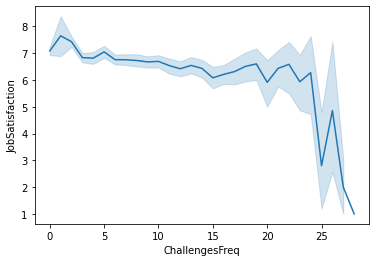

In [425]:
sns.lineplot(data=po, x="ChallengesFreq", y="JobSatisfaction")

In [408]:
corr_ch = []
for c in ch:
    corr_ch += [(stats.pearsonr(df[c], df["JobSatisfaction"]))[0]]
    print(c, '\t\t', (stats.pearsonr(df[c], df["JobSatisfaction"])))

WorkChallengeFrequencyPolitics 		 (-0.24741960923167056, 6.617708785767389e-78)
WorkChallengeFrequencyUnusedResults 		 (-0.12409641382552414, 2.021499671734774e-20)
WorkChallengeFrequencyDirtyData 		 (0.06781619889236729, 4.481052388443264e-07)
WorkChallengeFrequencyExplaining 		 (-0.022664243583303975, 0.09197195762542318)
WorkChallengeFrequencyTalent 		 (-0.16859066157902225, 1.5658230964639327e-36)
WorkChallengeFrequencyClarity 		 (-0.046716900616010644, 0.0005111356326910636)
WorkChallengeFrequencyDataAccess 		 (0.04677022301490557, 0.0005036223683016897)


In [409]:
len(corr_ch)

7

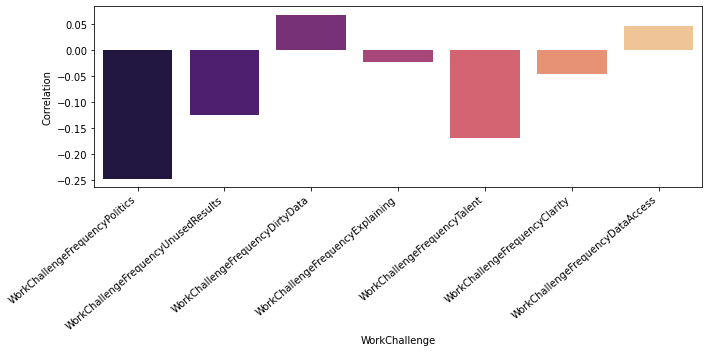

In [410]:
plo = pd.DataFrame(data={'WorkChallenge': ch, 'Correlation': corr_ch})
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='WorkChallenge', y='Correlation', data=plo, palette="magma")
ax.set_xticklabels(ch, rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [411]:
deneme = df.copy()
countries = deneme.groupby(by='Country').groups.keys()
work_ch_freq = deneme.groupby(by='Country').ChallengesFreq.mean()

In [412]:
deneme = df.copy()
countries = deneme.groupby(by='Country').groups.keys()
js = deneme.groupby(by='Country').JobSatisfaction.mean()

In [413]:
tog_js = zip(js, countries)
srt_js = sorted(tog_js, reverse=True)

In [414]:
tog = zip(work_ch_freq, countries)
srt = sorted(tog, reverse=True)

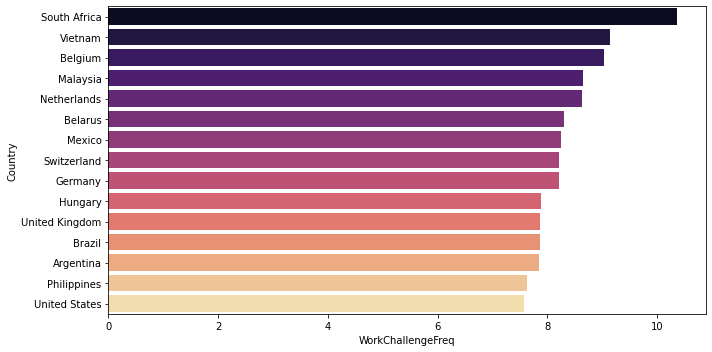

In [415]:
plo = pd.DataFrame(data={'Country': countries, 'WorkChallengeFreq': work_ch_freq, 'JobSatisfaction': js})
plo = plo.sort_values(by='WorkChallengeFreq', ascending=False)[:15]
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='WorkChallengeFreq', y='Country', data=plo, palette="magma")
plt.tight_layout()
plt.show()

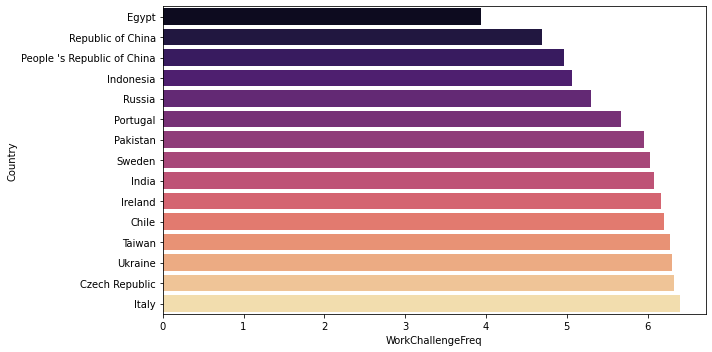

In [416]:
plo = pd.DataFrame(data={'Country': countries, 'WorkChallengeFreq': work_ch_freq, 'JobSatisfaction': js})
plo = plo.sort_values(by='WorkChallengeFreq', ascending=True)[:15]
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='WorkChallengeFreq', y='Country', data=plo, palette="magma")
plt.tight_layout()
plt.show()

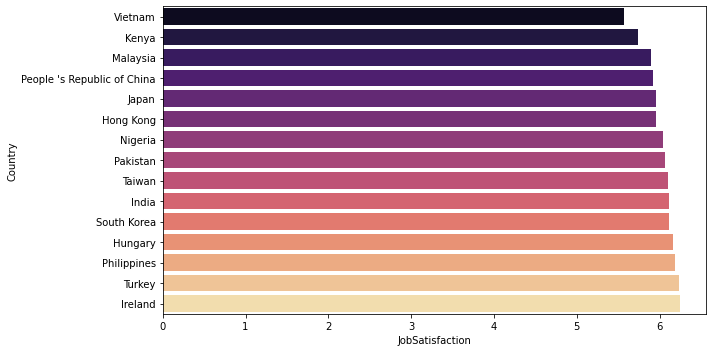

In [417]:
plo = pd.DataFrame(data={'Country': countries, 'WorkChallengeFreq': work_ch_freq, 'JobSatisfaction': js})
plo = plo.sort_values(by='JobSatisfaction', ascending=True)[:15]
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='JobSatisfaction', y='Country', data=plo, palette="magma")
plt.tight_layout()
plt.show()

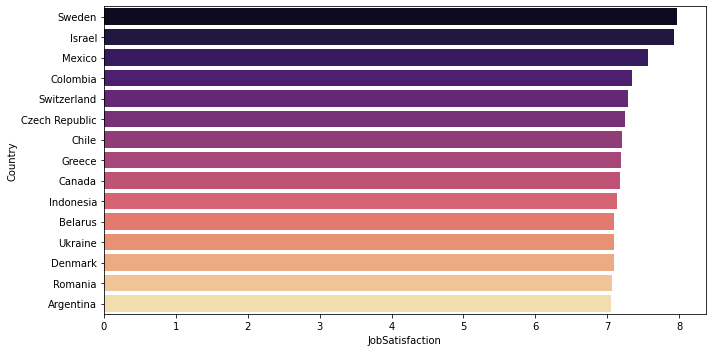

In [418]:
plo = pd.DataFrame(data={'Country': countries, 'WorkChallengeFreq': work_ch_freq, 'JobSatisfaction': js})
plo = plo.sort_values(by='JobSatisfaction', ascending=False)[:15]
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='JobSatisfaction', y='Country', data=plo, palette="magma")
plt.tight_layout()
plt.show()

In [419]:
usf = ['LearningPlatformUsefulnessBlogs',
       'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook',
       'LearningPlatformUsefulnessYouTube']


In [426]:
u = []
for c in usf:
    u += [(stats.pearsonr(df[c], df["JobSatisfaction"]))[0]]
    print(c, '\t\t', (stats.pearsonr(df[c], df["JobSatisfaction"])))

LearningPlatformUsefulnessBlogs 		 (0.020025175731633173, 0.13653226713834898)
LearningPlatformUsefulnessKaggle 		 (-0.022288135092629842, 0.09749613595906023)
LearningPlatformUsefulnessCourses 		 (-0.012498864969344128, 0.3527816492944299)
LearningPlatformUsefulnessProjects 		 (0.04710590371403801, 0.00045863818712250974)
LearningPlatformUsefulnessSO 		 (0.054216755879763275, 5.496065967772861e-05)
LearningPlatformUsefulnessTextbook 		 (0.036818357504783766, 0.0061810140024609155)
LearningPlatformUsefulnessYouTube 		 (-0.044886351483001824, 0.0008421582671051315)


In [434]:
methods = ['WorkMethodsFrequencyCross-Validation',
       'WorkMethodsFrequencyDataVisualization',
       'WorkMethodsFrequencyDecisionTrees',
       'WorkMethodsFrequencyLogisticRegression',
       'WorkMethodsFrequencyNeuralNetworks', 'WorkMethodsFrequencyPCA',
       'WorkMethodsFrequencyRandomForests',
       'WorkMethodsFrequencyTimeSeriesAnalysis']
df["MethodsFreq"] = np.zeros((df.shape[0]), dtype=float)
for row in df.itertuples():
    for col in methods:
        df["MethodsFreq"][row.Index] += df[col][row.Index]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [431]:
m = []
for c in methods:
    m += [(stats.pearsonr(df[c], df["ChallengesFreq"]))[0]]
    print(c, '\t\t', (stats.pearsonr(df[c], df["ChallengesFreq"])))

WorkMethodsFrequencyCross-Validation 		 (0.13731056034742695, 1.1082847216096737e-24)
WorkMethodsFrequencyDataVisualization 		 (0.21341514588155538, 5.658977427362809e-58)
WorkMethodsFrequencyDecisionTrees 		 (0.15247003613485324, 4.114157454239944e-30)
WorkMethodsFrequencyLogisticRegression 		 (0.16918613255411252, 8.805303811721282e-37)
WorkMethodsFrequencyNeuralNetworks 		 (0.009478728936588007, 0.4810164685622293)
WorkMethodsFrequencyPCA 		 (0.11151983393518711, 9.068718558760299e-17)
WorkMethodsFrequencyRandomForests 		 (0.15237017280765028, 4.487105298152296e-30)
WorkMethodsFrequencyTimeSeriesAnalysis 		 (0.15547076592581188, 2.951158915631011e-31)


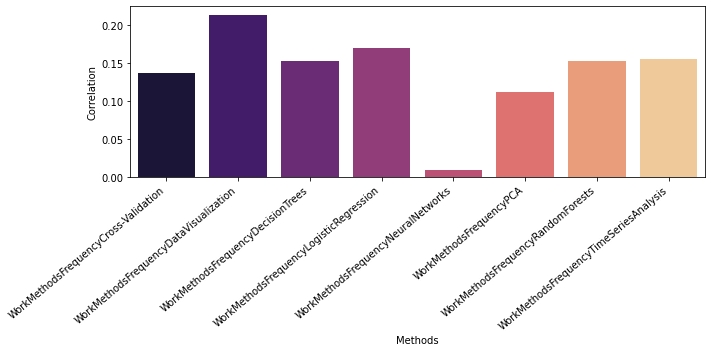

In [433]:
plo = pd.DataFrame(data={'Methods': methods, 'Correlation': m})
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Methods', y='Correlation', data=plo, palette="magma")
ax.set_xticklabels(methods, rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [438]:
stats.pearsonr(df["MethodsFreq"], df["JobSatisfaction"])


(0.15465527693834732, 6.070863256446625e-31)

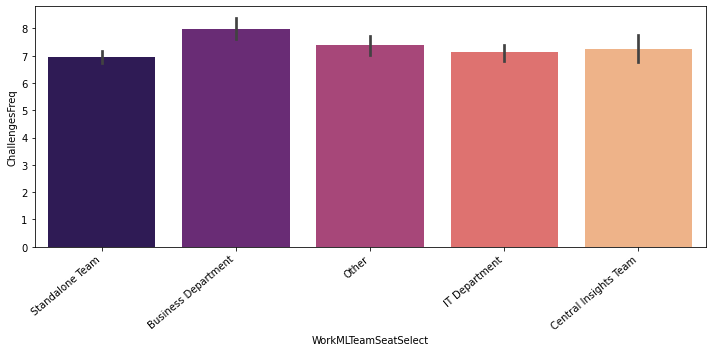

In [446]:
#plo = pd.DataFrame(data={'Methods': methods, 'Correlation': m})
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='WorkMLTeamSeatSelect', y='ChallengesFreq', data=df, palette="magma")
ax.set_xticklabels(df.WorkMLTeamSeatSelect.unique(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [439]:
df.WorkMLTeamSeatSelect.unique()

array(['Standalone Team', 'Business Department', 'Other', 'IT Department',
       'Central Insights Team', nan], dtype=object)

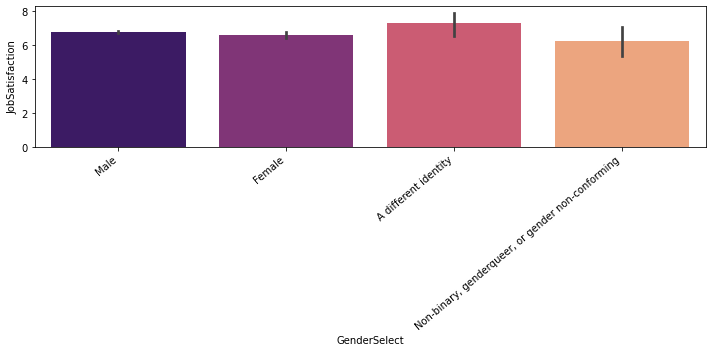

In [453]:
#plo = pd.DataFrame(data={'Methods': methods, 'Correlation': m})
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='GenderSelect', y='JobSatisfaction', data=df, palette="magma")
ax.set_xticklabels(df.GenderSelect.unique(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

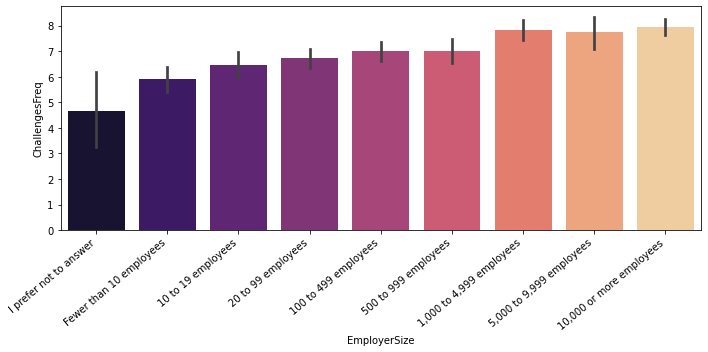

In [451]:
titles = ['I prefer not to answer', 'Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees', '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees']

plo = pd.read_excel('train.xlsx')
plo["ChallengesFreq"] = df["ChallengesFreq"]
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='EmployerSize', y='ChallengesFreq', data=plo, palette="magma", order=titles)
ax.set_xticklabels(titles, rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [459]:
df.WorkProductionFrequency.unique()

array([ 4.,  1.,  2.,  3.,  0., nan])

In [464]:
stats.pearsonr(df["WorkProductionFrequency"], df["JobSatisfaction"])

(0.1544956000593483, 6.988571169717196e-31)

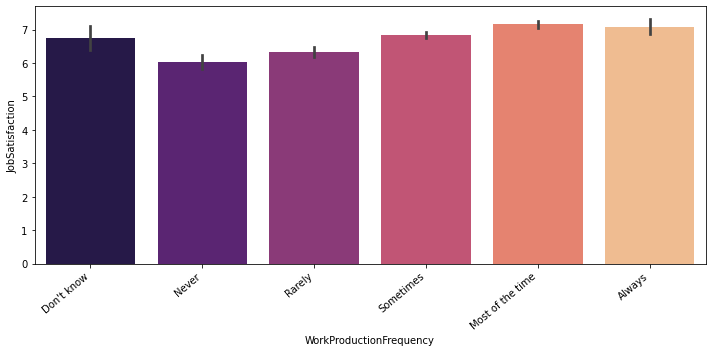

In [580]:
plo = pd.read_excel('train.xlsx')
plo["ChallengesFreq"] = df["ChallengesFreq"]
titles = ["Don't know", "Never", "Rarely", "Sometimes", "Most of the time", "Always"]
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='WorkProductionFrequency', y='JobSatisfaction', data=plo, palette="magma", order=titles)
ax.set_xticklabels(titles, rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [474]:
df["AgeGroup"] = pd.cut(df["Age"], [0,18,35,55,100], labels=["Children", "YoungAdult", "MiddleAgedAdults", "OlderAdults"])

In [528]:
usf = ['LearningPlatformUsefulnessBlogs',
       'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook',
       'LearningPlatformUsefulnessYouTube']


In [530]:
deneme = df.copy()
tmp = pd.DataFrame()
tmp["AgeGroup"] = np.zeros((28), dtype=float)
tmp["Usefullnes_of"] = np.zeros((28), dtype=float)

allf = []
for x in usf:
    agroups = deneme.groupby(by='AgeGroup').groups.keys()
    usf_freq = deneme.groupby(by='AgeGroup')[x].mean()
    allf += [usf_freq]
    
print(allf)

[AgeGroup
Children            1.272727
YoungAdult          1.181871
MiddleAgedAdults    1.101580
OlderAdults         0.852679
Name: LearningPlatformUsefulnessBlogs, dtype: float64, AgeGroup
Children            1.454545
YoungAdult          1.485954
MiddleAgedAdults    1.465011
OlderAdults         1.303571
Name: LearningPlatformUsefulnessKaggle, dtype: float64, AgeGroup
Children            0.636364
YoungAdult          1.411526
MiddleAgedAdults    1.450339
OlderAdults         1.406250
Name: LearningPlatformUsefulnessCourses, dtype: float64, AgeGroup
Children            1.727273
YoungAdult          1.223284
MiddleAgedAdults    1.232506
OlderAdults         1.468750
Name: LearningPlatformUsefulnessProjects, dtype: float64, AgeGroup
Children            1.454545
YoungAdult          1.508254
MiddleAgedAdults    1.326185
OlderAdults         1.107143
Name: LearningPlatformUsefulnessSO, dtype: float64, AgeGroup
Children            0.818182
YoungAdult          0.970460
MiddleAgedAdults    1.096501


In [531]:
agroups = deneme.groupby(by='AgeGroup').groups.keys()
print(list(agroups)*7)
tmp["AgeGroup"] = list(agroups)*7

['Children', 'YoungAdult', 'MiddleAgedAdults', 'OlderAdults', 'Children', 'YoungAdult', 'MiddleAgedAdults', 'OlderAdults', 'Children', 'YoungAdult', 'MiddleAgedAdults', 'OlderAdults', 'Children', 'YoungAdult', 'MiddleAgedAdults', 'OlderAdults', 'Children', 'YoungAdult', 'MiddleAgedAdults', 'OlderAdults', 'Children', 'YoungAdult', 'MiddleAgedAdults', 'OlderAdults', 'Children', 'YoungAdult', 'MiddleAgedAdults', 'OlderAdults']


In [534]:
mylist = []
for y in usf:
    mylist += (4*[y])

tmp["Usefullnes_of"] = mylist

In [535]:
mylist

['LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessYouTube',
 'LearningPlatformUsefulnessYouTube',
 'LearningPlatformUsefulnessYouTube'

In [536]:
tmp.head()

,AgeGroup,Usefullnes_of
0,Children,LearningPlatformUsefulnessBlogs
1,YoungAdult,LearningPlatformUsefulnessBlogs
2,MiddleAgedAdults,LearningPlatformUsefulnessBlogs
3,OlderAdults,LearningPlatformUsefulnessBlogs
4,Children,LearningPlatformUsefulnessKaggle


In [539]:
allf

[AgeGroup
 Children            1.272727
 YoungAdult          1.181871
 MiddleAgedAdults    1.101580
 OlderAdults         0.852679
 Name: LearningPlatformUsefulnessBlogs, dtype: float64, AgeGroup
 Children            1.454545
 YoungAdult          1.485954
 MiddleAgedAdults    1.465011
 OlderAdults         1.303571
 Name: LearningPlatformUsefulnessKaggle, dtype: float64, AgeGroup
 Children            0.636364
 YoungAdult          1.411526
 MiddleAgedAdults    1.450339
 OlderAdults         1.406250
 Name: LearningPlatformUsefulnessCourses, dtype: float64, AgeGroup
 Children            1.727273
 YoungAdult          1.223284
 MiddleAgedAdults    1.232506
 OlderAdults         1.468750
 Name: LearningPlatformUsefulnessProjects, dtype: float64, AgeGroup
 Children            1.454545
 YoungAdult          1.508254
 MiddleAgedAdults    1.326185
 OlderAdults         1.107143
 Name: LearningPlatformUsefulnessSO, dtype: float64, AgeGroup
 Children            0.818182
 YoungAdult          0.970460
 M

In [540]:
rates = []
for r in allf:
    for x in r:
        rates.append(x)
tmp["Avg_Rate"] = rates

In [541]:
tmp.head()

,AgeGroup,Usefullnes_of,Avg_Rate
0,Children,LearningPlatformUsefulnessBlogs,1.272727
1,YoungAdult,LearningPlatformUsefulnessBlogs,1.181871
2,MiddleAgedAdults,LearningPlatformUsefulnessBlogs,1.101580
3,OlderAdults,LearningPlatformUsefulnessBlogs,0.852679
4,Children,LearningPlatformUsefulnessKaggle,1.454545


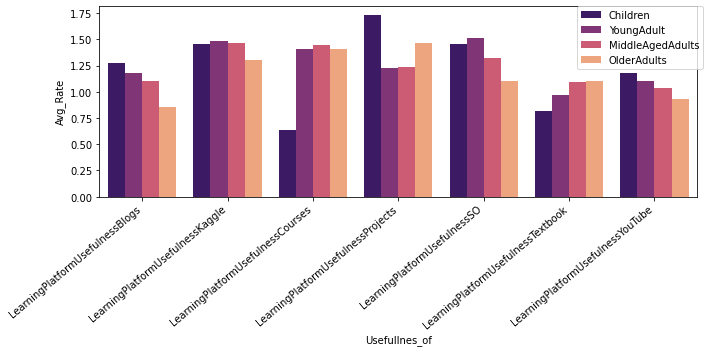

In [542]:
#plo = pd.read_excel('train.xlsx')
#plo["ChallengesFreq"] = df["JobSatisfaction"]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Usefullnes_of', y='Avg_Rate', data=tmp, palette="magma", hue="AgeGroup")
ax.set_xticklabels(usf, rotation=40, ha="right")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

In [562]:
deneme = df.copy()
tmp = pd.DataFrame()
tmp["Tenure"] = np.zeros((42), dtype=float)
tmp["Usefullnes_of"] = np.zeros((42), dtype=float)

allf = []
for x in usf:
    agroups = deneme.groupby(by='Tenure').groups.keys()
    usf_freq = deneme.groupby(by='Tenure')[x].mean()
    allf += [usf_freq]
    
print(allf)

[Tenure
0.0    0.300000
1.0    1.008658
2.0    1.107717
3.0    1.242701
4.0    1.172098
5.0    1.067068
Name: LearningPlatformUsefulnessBlogs, dtype: float64, Tenure
0.0    0.550000
1.0    1.632035
2.0    1.586817
3.0    1.517640
4.0    1.403259
5.0    1.291488
Name: LearningPlatformUsefulnessKaggle, dtype: float64, Tenure
0.0    0.800000
1.0    1.489177
2.0    1.476688
3.0    1.445864
4.0    1.406314
5.0    1.309544
Name: LearningPlatformUsefulnessCourses, dtype: float64, Tenure
0.0    0.650000
1.0    1.002165
2.0    1.139068
3.0    1.272506
4.0    1.287169
5.0    1.355116
Name: LearningPlatformUsefulnessProjects, dtype: float64, Tenure
0.0    0.150000
1.0    1.361472
2.0    1.444534
3.0    1.521898
4.0    1.501018
5.0    1.282029
Name: LearningPlatformUsefulnessSO, dtype: float64, Tenure
0.0    0.950000
1.0    0.865801
2.0    0.974277
3.0    1.005474
4.0    1.047862
5.0    1.109200
Name: LearningPlatformUsefulnessTextbook, dtype: float64, Tenure
0.0    0.950000
1.0    1.155844
2.0   

In [563]:
agroups = deneme.groupby(by='Tenure').groups.keys()
print(list(agroups)*7)
tmp["Tenure"] = list(agroups)*7

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


In [564]:
mylist = []
for y in usf:
    mylist += (6*[y])

tmp["Usefullnes_of"] = mylist

In [565]:
rates = []
for r in allf:
    for x in r:
        rates.append(x)
tmp["Avg_Rate"] = rates

In [567]:
ten_map = {3: '3 to 5 years', 2: '1 to 2 years', 4: '6 to 10 years', 5: 'More than 10 years', 1: 'Less than a year', 0: "I don't write code to analyze data"}


In [570]:
tmp["Tenure"] = tmp["Tenure"].replace(ten_map)

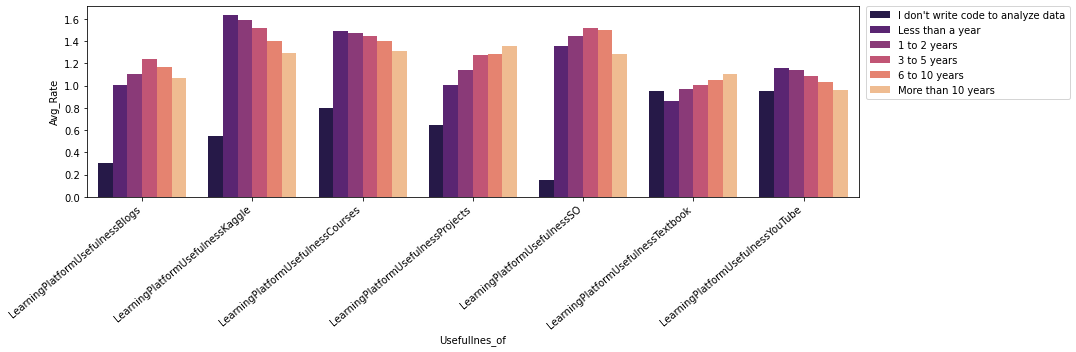

In [571]:
#plo = pd.read_excel('train.xlsx')
#plo["ChallengesFreq"] = df["JobSatisfaction"]

plt.figure(figsize=(15, 5))
ax = sns.barplot(x='Usefullnes_of', y='Avg_Rate', data=tmp, palette="magma", hue="Tenure")
ax.set_xticklabels(usf, rotation=40, ha="right")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

In [572]:
df.WorkDataVisualizations.unique()

array([ 4.,  6.,  2.,  5.,  1.,  3.,  0., nan])

In [576]:
plo.WorkDataVisualizations.unique()

array(['51-75% of projects', '100% of projects', '10-25% of projects',
       '76-99% of projects', 'Less than 10% of projects',
       '26-50% of projects', 'None', nan], dtype=object)

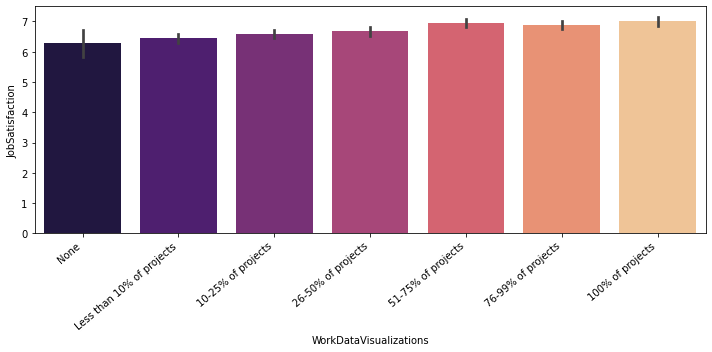

In [577]:
plo = pd.read_excel('train.xlsx')

titles = ['None', 'Less than 10% of projects', '10-25% of projects', '26-50% of projects', '51-75% of projects', '76-99% of projects', '100% of projects']
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='WorkDataVisualizations', y='JobSatisfaction', data=plo, palette="magma", order=titles)
ax.set_xticklabels(titles, rotation=40, ha="right")
plt.tight_layout()
plt.show()